### Project Summary:
 Scalable Clustering Pipeline with PCA Visualization
This project presents a modular data clustering pipeline built using Python’s Scikit-learn, designed to efficiently group multivariate data while offering intuitive visual insights. Beginning with robust data preprocessing—including exploratory analysis, irrelevant column removal, and feature scaling via StandardScaler—the workflow guides users through KMeans clustering supported by the Elbow Method to determine optimal cluster count. Dimensionality reduction is achieved using Principal Component Analysis (PCA), enabling a clean 3D visualization of cluster distribution. The code is cleanly structured for scalability and can be integrated into FastAPI or Dockerized microservices for real-world applications. Ideal for data science exploration, educational use, and adaptable clustering systems. 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:

from sklearn.cluster import KMeans

## Step 1: Load and Inspect the Dataset

We begin by loading the university dataset and inspecting its structure using `.info()` and `.describe()`. This helps identify missing values, data types, and feature distributions.

In [3]:
df=pd.read_excel("University_Clustering.xlsx")
df

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90
5,Dartmouth,NH,1340,89,23,10,32162,95
6,Duke,NC,1315,90,30,12,31585,95
7,Georgetown,DC,1255,74,24,12,20126,92
8,Harvard,MA,1400,91,14,11,39525,97
9,JohnsHopkins,MD,1305,75,44,7,58691,87


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [5]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [6]:
df.drop("State",axis=1,inplace=True)

##  Step 2: Drop Irrelevant Columns

We remove the `"Univ"` column since it's a label and not useful for clustering. This ensures our clustering is based purely on numerical features.

In [7]:
new_df=df.drop("Univ",axis=1)
new_df

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [8]:
from sklearn.preprocessing  import StandardScaler

##  Step 3: Feature Scaling with StandardScaler

To ensure fair clustering, we scale all features using `StandardScaler`. This standardizes each feature to have mean 0 and variance 1.

In [38]:
for col in new_df:
    ss= StandardScaler() 
    new_df[col]=ss.fit_transform(new_df[[col]]) 


## Step 4: Elbow Method to Determine Optimal Clusters

We compute Within-Cluster Sum of Squares (WCSS) for cluster counts from 1 to 8. The Elbow Method helps us choose the best number of clusters by identifying the point where WCSS starts to flatten.

In [10]:
wcss=[]
clusters=list(range(1,9))
for K in clusters:
    model=KMeans(n_clusters=K)
    model.fit(new_df)
    wcss.append(model.inertia_)

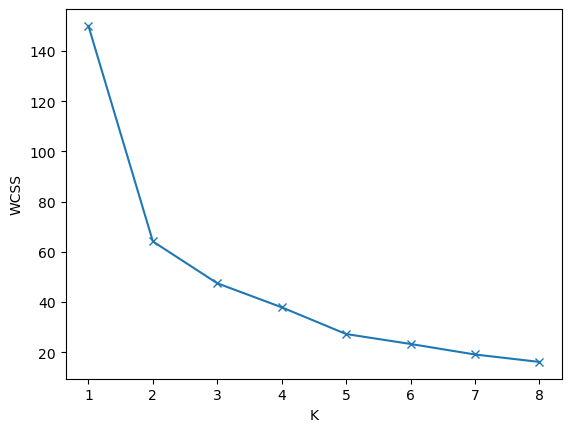

In [11]:
plt.figure()
plt.plot(clusters,wcss,"x-")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()


albo method is graphical representation of finding the optimal K in k means clustering it works by finding WCSS  that is the sum of square distance between points in a cluster and the clusters centroid 

In [12]:
model=KMeans(n_clusters=3)
model.fit(new_df)

KMeans(n_clusters=3)

In [13]:
model.labels_

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 1, 1, 1, 1,
       1, 2, 0])

In [14]:
df.columns

Index(['Univ', 'SAT', 'Top10', 'Accept', 'SFRatio', 'Expenses', 'GradRate'], dtype='object')

In [15]:
df["labels"]=model.labels_

In [16]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,1


In [17]:
df[df['labels']==0]["Univ"]

0            Brown
1          CalTech
3         Columbia
5        Dartmouth
6             Duke
8          Harvard
9     JohnsHopkins
10             MIT
14       Princeton
16        Stanford
24            Yale
Name: Univ, dtype: object

In [18]:
df[df['labels']==1]["Univ"]

2              CMU
4          Cornell
7       Georgetown
11    Northwestern
12       NotreDame
18      UCBerkeley
19        UChicago
20       UMichigan
21           UPenn
22             UVA
Name: Univ, dtype: object

In [19]:
df[df['labels']==2]["Univ"]

13     PennState
15        Purdue
17      TexasA&M
23    UWisconsin
Name: Univ, dtype: object

In [24]:
from sklearn.decomposition import PCA

##  Step 6: Reduce Dimensions with PCA

We apply Principal Component Analysis (PCA) to reduce the dataset to 3 dimensions. This enables us to visualize clusters in 3D space while preserving maximum variance.

In [25]:
pca = PCA(n_components=3,random_state=1)

In [26]:
components=pca.fit_transform(new_df)
components

array([[ 1.00987445, -1.06430962,  0.08106631],
       [ 2.82223781,  2.25904458,  0.83682883],
       [-1.11246577,  1.63120889, -0.26678684],
       [ 0.74174122, -0.04218747,  0.06050086],
       [ 0.31191206, -0.63524357,  0.01024052],
       [ 1.69669089, -0.34436328, -0.25340751],
       [ 1.24682093, -0.49098366, -0.03209382],
       [ 0.33874978, -0.78516859, -0.49358483],
       [ 2.37415013, -0.38653888,  0.11609839],
       [ 1.40327739,  2.11951503, -0.44282714],
       [ 1.72610332,  0.08823712,  0.17040366],
       [ 0.45085748, -0.01113295, -0.17574605],
       [-0.04023814, -1.00920438, -0.49651717],
       [-3.23373034, -0.37458049, -0.49537282],
       [ 2.23626502, -0.37179329, -0.39899365],
       [-5.17299212,  0.77991535, -0.38591233],
       [ 1.69964377, -0.30559745,  0.31850785],
       [-4.578146  , -0.34759136,  1.49964176],
       [-0.82260312, -0.69890615,  1.42781145],
       [ 0.09776213,  0.65044645,  0.10050844],
       [-1.9631826 , -0.22476756, -0.255

In [27]:
pc1=components[:,0]
pc2=components[:,1]
pc3=components[:,2]

##  Step 7: Visualize Clusters in 3D

Using `matplotlib`, we plot the PCA components in a 3D scatter plot. Each point is colored by its cluster label, offering intuitive visual insights into cluster separation.

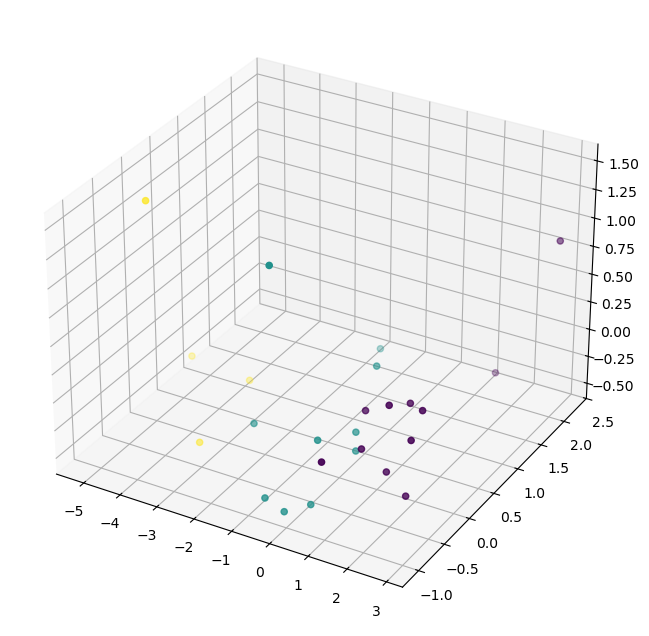

In [28]:
fig=plt.figure(figsize=(8,8))
ax=plt.axes(projection='3d')
ax.scatter(pc1,pc2,pc3 ,c=df['labels'])
plt.show()

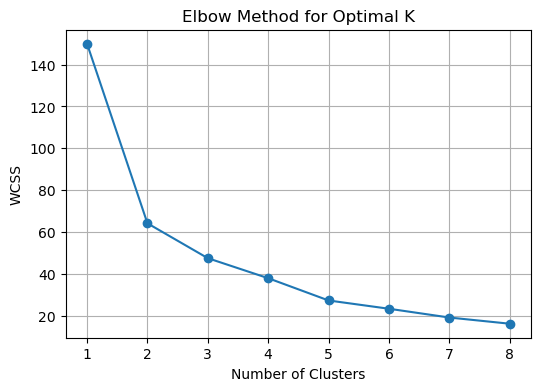

In [29]:
plt.figure(figsize=(6,4))
plt.plot(clusters, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

##  Elbow Method: Choosing Optimal Clusters
This plot helps identify the ideal number of clusters by locating the 'elbow' point where WCSS starts to flatten.



In [30]:
df['Cluster'] = model.labels_
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels,Cluster
0,Brown,1310,89,22,13,22704,94,0,0
1,CalTech,1415,100,25,6,63575,81,0,0
2,CMU,1260,62,59,9,25026,72,1,1
3,Columbia,1310,76,24,12,31510,88,0,0
4,Cornell,1280,83,33,13,21864,90,1,1


##  Cluster Labels Assigned to Each University
Here’s how each university was grouped based on multivariate features.

In [34]:
df.groupby('Cluster').mean(numeric_only=True)

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
Cluster,,,,,,,
0,1353.181818,89.090909,24.090909,10.181818,38618.727273,92.00,0.0
1,1253.000000,77.700000,43.500000,12.900000,22008.200000,86.90,1.0
2,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.75,2.0


##  Cluster-Wise Feature Averages
This table shows the average values of each feature per cluster, helping interpret group characteristics.

In [35]:
df.to_excel("Clustered_Universities.xlsx", index=False)

## Exporting Results
Clustered data saved for downstream use or integration into microservices.